In [1]:
import pandas as pd
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt
#from pyensembl import EnsemblRelease

In [2]:
#!pip install gseapy

In [3]:
#!pyensembl install --release 108 --species homo_sapiens

In [4]:
#EnsemblRelease(108).transcript_ids_of_gene_name('MIR5692A2')

In [5]:
def select_gene_DE_UP(data):   
    gene_list_up =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] > 1) & (data.iloc[i,5] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_gene_DE_DOWN(data):   
    gene_list_down =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] < -1) & (data.iloc[i,5] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

In [15]:
#gp.get_library_name()

In [16]:
def enrichment_up(data):
    gene_up = select_gene_DE_UP(data)
    enrichment_up = gp.enrichr(gene_list=gene_up,
                 gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_up
    
def enrichment_down(data):
    gene_down = select_gene_DE_DOWN(data)
    enrichment_down = gp.enrichr(gene_list=gene_down,
                 gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_down

def enrichment_merged(data):
    gene_down = select_gene_DE_DOWN(data)
    gene_up = select_gene_DE_UP(data)
    genes = gene_down + gene_up
    enrichment_merged = gp.enrichr(gene_list=genes,
                                   gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                            )
    return enrichment_merged

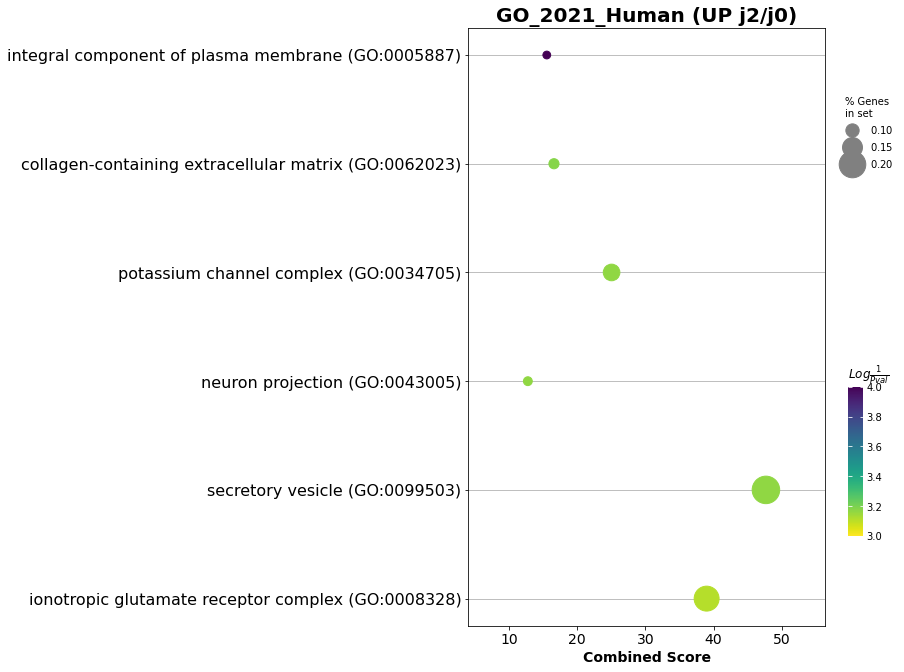

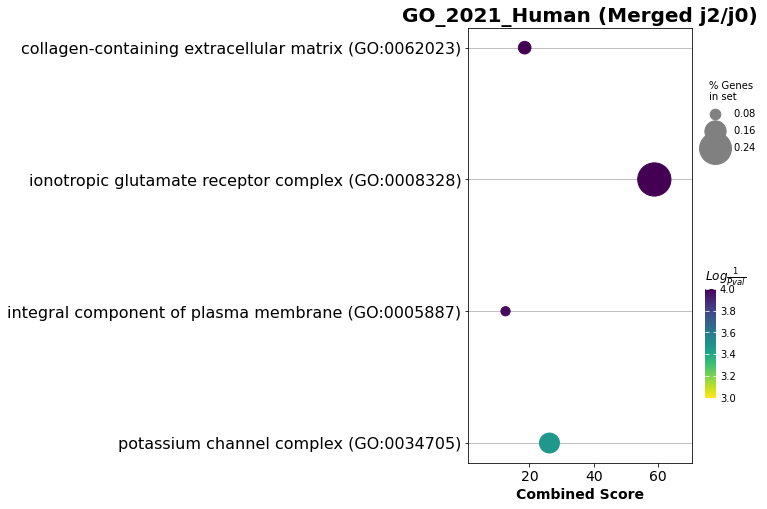

In [25]:
from gseapy import barplot, dotplot
data1 = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t')

enrichment_up1 = enrichment_up(data1)
enrichment_down1 = enrichment_down(data1)
enrichment_merged1 = enrichment_merged(data1)

ax1 = dotplot(enrichment_up1.res2d, title='GO_2021_Human (UP j2/j0)',cmap='viridis_r', size=50, figsize=(8,11))
ax2 = dotplot(enrichment_down1.res2d, title='GO_2021_Human (DOWN j2/j0)',cmap='viridis_r', size=50, figsize=(8,11))
# ax3 = barplot(enrichment_up1.res2d,title='KEGG_2021_Human (UP j2/j0)', figsize=(5, 8))
# ax4 = barplot(enrichment_down1.res2d,title='KEGG_2021_Human (DOWN j2/j0)', figsize=(5, 8))
ax5 = dotplot(enrichment_merged1.res2d, title='GO_2021_Human (Merged j2/j0)',cmap='viridis_r',size=50, figsize=(5,8))

In [19]:
test = enrichment_merged1.results.sort_values("P-value")
comptage = []
for i in range(len(test["Genes"])):
    comptage.append(test.iloc[i,9].split(';'))
print(comptage)

[['LDHA', 'TPI1', 'PKLR', 'HKDC1', 'PGK1', 'ALDOC', 'ENO2', 'ALDOA', 'GAPDH', 'HK2'], ['TPI1', 'PKLR', 'PGK1', 'ALDOC', 'ENO2', 'ALDOA', 'GAPDH', 'HK2', 'PFKP'], ['TPI1', 'PKLR', 'PGK1', 'ALDOC', 'ENO2', 'ALDOA', 'GAPDH', 'HK2', 'PFKP'], ['TPI1', 'PKLR', 'PGK1', 'ALDOC', 'ENO2', 'ALDOA', 'GAPDH', 'HK2', 'PFKP'], ['RIPOR2', 'IL1RN', 'CCL11', 'SELPLG', 'IL24', 'RORA', 'AKAP6', 'CXCL2', 'ICAM1', 'SOCS2', 'GHR', 'ZFP36', 'MT2A', 'MUC1', 'IL1RL2', 'PIM1', 'ANKRD1', 'TNFSF11', 'IL12A', 'TIMP1', 'CD36', 'JUNB', 'SH2B3', 'GBP1', 'EGR1', 'VCAM1', 'MMP1', 'IL13', 'MMP3', 'IL31RA', 'LIF', 'IL19', 'IFNLR1', 'NR1D1', 'FOS', 'TNFRSF1B', 'OSMR', 'EREG', 'GREM2', 'CXCL12', 'HCLS1', 'RHOU', 'GAPDH', 'TNFRSF21', 'IL18R1', 'CCL26', 'TLR2'], ['COL17A1', 'COL13A1', 'LAMC3', 'LAMA1', 'ELN', 'LAMA3', 'ICAM5', 'ICAM1', 'ADAMTS5', 'ADAMTS3', 'ADAMTS1', 'SPP1', 'COL10A1', 'JAM2', 'VCAM1', 'VWF', 'MMP1', 'ITGA2', 'MMP3', 'MMP8', 'MMP10', 'MMP11', 'VCAN', 'ITGA10', 'PECAM1', 'ITGA6', 'ITGA5'], ['COL17A1', 'COL13A

In [23]:
enrichment_down1.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,17/482,0.000016,0.021157,0,0,3.622730,39.971691,EGR1;SELPLG;CCL11;VCAM1;IL13;IL31RA;LIF;FOS;CX...
1,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),19/621,0.000036,0.023904,0,0,3.137504,32.060106,EGR1;CCL11;VCAM1;IL13;IL31RA;LIF;FOS;CXCL3;MID...
1310,GO_Molecular_Function_2021,sequence-specific DNA binding (GO:0043565),19/707,0.000199,0.011768,0,0,2.733010,23.286519,KLF10;EGR1;EGR2;JUN;FOS;KLF4;CXXC4;KLF2;ETV7;S...
1311,GO_Molecular_Function_2021,double-stranded DNA binding (GO:0003690),18/651,0.000208,0.011768,0,0,2.807690,23.797370,KLF10;EGR1;EGR2;JUN;FOS;KLF4;KLF2;ETV7;SIX2;HE...
1312,GO_Molecular_Function_2021,sequence-specific double-stranded DNA binding ...,19/712,0.000218,0.011768,0,0,2.712581,22.870818,KLF10;EGR1;EGR2;JUN;FOS;GLI1;KLF4;KLF2;ETV7;SI...
...,...,...,...,...,...,...,...,...,...,...
1591,GO_Cellular_Component_2021,mitochondrial membrane (GO:0031966),1/469,0.993637,0.998566,0,0,0.195650,0.001249,UCP3
1592,GO_Cellular_Component_2021,intracellular organelle lumen (GO:0070013),3/848,0.994604,0.998566,0,0,0.321786,0.001741,ADAMTS5;VCAN;IL12A
1593,GO_Cellular_Component_2021,nucleolus (GO:0005730),2/733,0.996796,0.998566,0,0,0.248283,0.000797,PIM1;ATF3
1594,GO_Cellular_Component_2021,intracellular non-membrane-bounded organelle (...,4/1158,0.998566,0.998566,0,0,0.310525,0.000446,VCAM1;PIM1;ATF3;RHOBTB1


In [10]:
data2 = pd.read_csv("Transcriptomic/all_de_j4_vs_j0_allgenes.txt", sep='\t')

enrichment_up2 = enrichment_up(data2)
enrichment_down2 = enrichment_down(data2)

# ax1 = dotplot(enrichment_up2.res2d, title='KEGG_2021_Human (UP j4/j0)',cmap='viridis_r', size=50, figsize=(8,11))
# ax2 = dotplot(enrichment_down2.res2d, title='KEGG_2021_Human (DOWN j4/j0)',cmap='plasma', size=50, figsize=(8,11))

In [11]:
enrichment_up2.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Aldosterone-regulated sodium reabsorption,8/37,0.003874,0.719263,0,0,3.616035,2.008149e+01,FXYD2;SCNN1A;NEDD4L;ATP1A3;ATP1B3;PIK3R1;SGK1;...
1,KEGG_2021_Human,Complement and coagulation cascades,13/85,0.006870,0.719263,0,0,2.369632,1.180210e+01,SERPINB2;VWF;C5AR1;PLAT;F3;C3;THBD;C8G;PROC;BD...
2,KEGG_2021_Human,Breast cancer,19/147,0.008276,0.719263,0,0,1.950515,9.351591e+00,FZD1;JAG2;SHC2;SHC3;FZD4;NCOA3;WNT7B;FZD9;FZD8...
3,KEGG_2021_Human,Calcium signaling pathway,27/240,0.012241,0.719263,0,0,1.667501,7.341905e+00,CALML6;PDE1A;HTR2B;ADCY8;FGF2;CACNA1E;GRM1;MYL...
4,KEGG_2021_Human,ABC transporters,8/45,0.013078,0.719263,0,0,2.832967,1.228618e+01,ABCA1;ABCC3;ABCA6;ABCA9;ABCA7;ABCC9;ABCA12;ABCA13
...,...,...,...,...,...,...,...,...,...,...
270,KEGG_2021_Human,Ribosome,1/158,0.999988,0.999995,0,0,0.082507,9.593524e-07,MRPS6
271,KEGG_2021_Human,Prion disease,4/273,0.999993,0.999995,0,0,0.191852,1.327298e-06,C8G;CASP12;PIK3R1;COX6B2
272,KEGG_2021_Human,Herpes simplex virus 1 infection,8/498,0.999995,0.999995,0,0,0.208691,1.038348e-06,C3;ZNF540;DDX58;ZNF689;ZNF425;PIK3R1;ZNF33B;TLR2
273,KEGG_2021_Human,Olfactory transduction,2/440,0.999995,0.999995,0,0,0.058287,2.793339e-07,CALML6;PDE1A


In [12]:
enrichment_down2.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cell cycle,22/124,3.107585e-08,0.000008,0,0,4.678127,8.087001e+01,CDKN1A;GADD45B;PLK1;BUB1B;TTK;CDC25C;PKMYT1;SM...
1,KEGG_2021_Human,Human T-cell leukemia virus 1 infection,23/219,1.411344e-04,0.019194,0,0,2.535499,2.247922e+01,EGR1;EGR2;JUN;CDKN1A;MMP7;SRF;BUB1B;FOS;HLA-F;...
2,KEGG_2021_Human,Oocyte meiosis,16/129,2.195374e-04,0.019905,0,0,3.048422,2.567987e+01,PLK1;CDC25C;PKMYT1;ADCY7;SMC1B;AURKA;CDC20;SGO...
3,KEGG_2021_Human,Oxytocin signaling pathway,16/154,1.555658e-03,0.077545,0,0,2.492885,1.611864e+01,OXTR;JUN;CDKN1A;KCNJ6;CAMK1D;KCNJ12;FOS;ADCY7;...
4,KEGG_2021_Human,Progesterone-mediated oocyte maturation,12/100,1.733868e-03,0.077545,0,0,2.926431,1.860450e+01,CCNA2;CCNB2;CCNB1;PLK1;CDK1;KIF22;CDC25C;PKMYT...
...,...,...,...,...,...,...,...,...,...,...
267,KEGG_2021_Human,Tuberculosis,2/180,9.976426e-01,0.999996,0,0,0.237309,5.600969e-04,IL6;CALM3
268,KEGG_2021_Human,Coronavirus disease,3/232,9.983935e-01,0.999996,0,0,0.276251,4.441488e-04,JUN;IL6;FOS
269,KEGG_2021_Human,Neuroactive ligand-receptor interaction,5/341,9.994823e-01,0.999996,0,0,0.312717,1.619287e-04,OXTR;EDN1;LEPR;GRIK4;APLN
270,KEGG_2021_Human,Herpes simplex virus 1 infection,8/498,9.998924e-01,0.999996,0,0,0.341426,3.672606e-05,IL6;ALYREF;SRSF3;ZNF404;ZNF610;HLA-F;SRSF7;ZNF442


In [15]:
data3 = pd.read_csv("Transcriptomic/all_de_j4_vs_j2_allgenes.txt", sep='\t')

enrichment_up3 = enrichment_up(data3)
enrichment_down3 = enrichment_down(data3)

enrichment_up3.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Protein processing in endoplasmic reticulum,18/171,2.782011e-08,0.000006,0,0,5.600058,97.427040,PDIA3;ERO1B;HSPA5;DERL3;SEL1L;SYVN1;PDIA6;PDIA...
1,KEGG_2021_Human,Aldosterone-regulated sodium reabsorption,5/37,1.064442e-03,0.106444,0,0,7.252821,49.647765,SCNN1A;PIK3R3;ATP1A3;PIK3R1;SGK1
2,KEGG_2021_Human,Leukocyte transendothelial migration,7/114,1.109847e-02,0.619194,0,0,3.039480,13.680540,CLDN4;VCAM1;CXCL12;PECAM1;PIK3R3;ESAM;PIK3R1
3,KEGG_2021_Human,Protein export,3/23,1.238388e-02,0.619194,0,0,6.934043,30.449877,SPCS3;HSPA5;SEC11C
4,KEGG_2021_Human,Carbohydrate digestion and absorption,4/47,1.760501e-02,0.681665,0,0,4.305301,17.391575,PIK3R3;ATP1A3;PIK3R1;TAS1R3
...,...,...,...,...,...,...,...,...,...,...
195,KEGG_2021_Human,Adrenergic signaling in cardiomyocytes,1/150,9.609023e-01,0.978835,0,0,0.306751,0.012234,ATP1A3
196,KEGG_2021_Human,Oxytocin signaling pathway,1/154,9.641522e-01,0.978835,0,0,0.298670,0.010903,MYLK4
197,KEGG_2021_Human,Hippo signaling pathway,1/163,9.705125e-01,0.980316,0,0,0.281946,0.008439,FZD8
198,KEGG_2021_Human,Herpes simplex virus 1 infection,5/498,9.822954e-01,0.987232,0,0,0.459666,0.008211,PDIA3;PIK3R3;PIK3R1;CALR;TLR3


In [16]:
enrichment_down3.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cell cycle,19/124,7.295732e-08,0.000018,0,0,5.046678,82.934030,PLK1;BUB1B;TTK;CDC25C;PKMYT1;CDC25A;CDC20;CCNA...
1,KEGG_2021_Human,Glycolysis / Gluconeogenesis,12/67,3.496086e-06,0.000434,0,0,6.039398,75.878193,GPI;LDHA;TPI1;ALDH1B1;PGAM1;PGK1;ALDOC;ENO1;EN...
2,KEGG_2021_Human,Oocyte meiosis,16/129,1.301790e-05,0.001076,0,0,3.930177,44.211289,PLK1;ADCY4;CDC25C;PKMYT1;AURKA;CDC20;SGO1;CCNB...
3,KEGG_2021_Human,Progesterone-mediated oocyte maturation,13/100,5.058824e-05,0.003136,0,0,4.135248,40.905010,PLK1;ADCY4;KIF22;CDC25C;PKMYT1;CDC25A;AURKA;CC...
4,KEGG_2021_Human,Fanconi anemia pathway,9/54,1.047393e-04,0.005195,0,0,5.515186,50.541367,RMI2;BLM;BRIP1;RAD51;EME1;FANCD2;UBE2T;FANCA;B...
...,...,...,...,...,...,...,...,...,...,...
243,KEGG_2021_Human,Lipid and atherosclerosis,1/215,9.995791e-01,0.999979,0,0,0.126281,0.000053,CALM3
244,KEGG_2021_Human,Coronavirus disease,1/232,9.997719e-01,0.999979,0,0,0.116883,0.000027,MASP1
245,KEGG_2021_Human,Pathways of neurodegeneration,5/475,9.998358e-01,0.999979,0,0,0.285249,0.000047,TUBA1C;TUBA1B;KLC3;CALM3;DKK2
246,KEGG_2021_Human,Olfactory transduction,3/440,9.999792e-01,0.999979,0,0,0.183872,0.000004,CALM3;NCALD;SLC8A2


In [34]:
prot = pd.read_csv('Proteomique/Experience1.txt', sep='\t', decimal=',')
prot.iloc[:,[2,3,21,30,31,32,36,37,38]]

,Accession,Description,Gene Symbol,Abundance Ratio (log2): (T48h) / (T0),Abundance Ratio (log2): (T96h) / (T0),Abundance Ratio (log2): (T96h) / (T48h),Abundance Ratio Adj. P-Value: (T48h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T48h)
0,P21333,Filamin-A OS=Homo sapiens OX=9606 GN=FLNA PE=1...,FLNA,0.28,0.11,-0.17,0.840755,0.990871,0.998956
1,P02751,Fibronectin OS=Homo sapiens OX=9606 GN=FN1 PE=...,NaN,0.43,1.10,0.63,0.502648,0.208298,0.357915
2,Q15149,Plectin OS=Homo sapiens OX=9606 GN=PLEC PE=1 SV=3,PLEC,0.40,0.43,0.05,0.571962,0.881723,0.991557
3,P35579,Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...,MYH9,0.63,0.18,-0.43,0.138462,0.984753,0.952977
4,P12111,Collagen alpha-3(VI) chain OS=Homo sapiens OX=...,COL6A3,1.05,1.48,0.37,0.000539,0.049603,0.746597
...,...,...,...,...,...,...,...,...,...
1654,Q9HD15,Steroid receptor RNA activator 1 OS=Homo sapie...,SRA1,-0.21,-1.25,-1.04,0.734428,0.211168,0.227589
1655,Q99747,Gamma-soluble NSF attachment protein OS=Homo s...,NAPG,NaN,NaN,NaN,NaN,NaN,NaN
1656,Q2TAL8,Glutamine-rich protein 1 OS=Homo sapiens OX=96...,QRICH1,-0.05,0.61,0.69,0.942169,0.729703,0.281920
1657,Q712K3,Ubiquitin-conjugating enzyme E2 R2 OS=Homo sap...,UBE2R2,0.50,0.44,-0.02,0.549943,0.873119,0.991557


In [35]:
def select_prot_T48_T0_UP(data):   
    gene_list_up =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,30] > 1) & (data.iloc[i,36] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T48_T0_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,30] < -1) & (data.iloc[i,36] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

def select_prot_T96_T0_UP(data):   
    gene_list_up =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,31] > 1) & (data.iloc[i,37] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T96_T0_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,31] < -1) & (data.iloc[i,37] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

def select_prot_T96_T48_UP(data):   
    gene_list_up =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,32] > 1) & (data.iloc[i,38] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T96_T48_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,32] < -1) & (data.iloc[i,38] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

In [39]:
select_prot_T48_T0_UP(prot.dropna())

['COL6A3',
 'COL6A1',
 'COL1A2',
 'SERPINE1',
 'MMP2',
 'THBS1',
 'COL3A1',
 'DCN',
 'COL5A1',
 'TIMP1',
 'C1S',
 'APP',
 'MMP3',
 'COL4A2',
 'CXCL5']

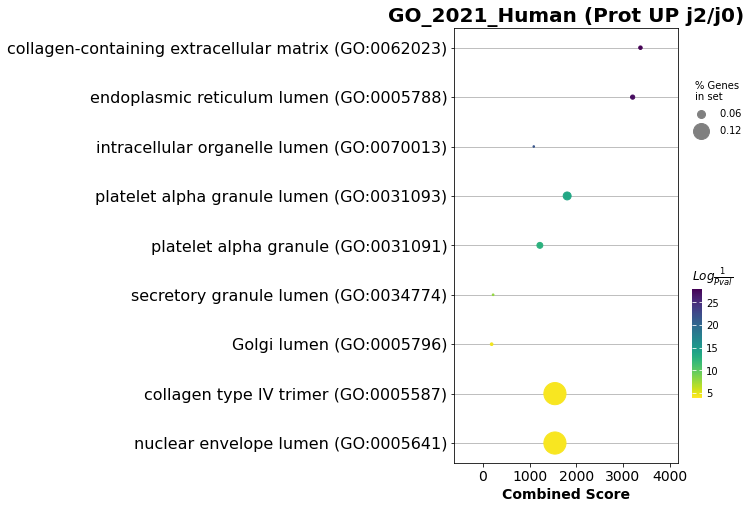

In [40]:
# FOR T48/T0

enrichment_up = gp.enrichr(gene_list=select_prot_T48_T0_UP(prot.dropna()),
                 gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                )

ax = dotplot(enrichment_up.res2d,title='GO_2021_Human (Prot UP j2/j0)',cmap='viridis_r', size=50, figsize=(5, 8))

In [77]:
enrichment_up.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Protein digestion and absorption,6/103,7.758406e-11,3.568867e-09,0,0,136.687285,3182.033400,COL3A1;COL1A2;COL5A1;COL4A2;COL6A1;COL6A3
1,KEGG_2021_Human,ECM-receptor interaction,5/88,4.262835e-09,9.804520e-08,0,0,119.891566,2310.709896,COL1A2;COL4A2;COL6A1;COL6A3;THBS1
2,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complic...,5/100,8.151373e-09,1.249877e-07,0,0,104.684211,1949.751735,COL3A1;COL1A2;COL4A2;MMP2;SERPINE1
3,KEGG_2021_Human,Focal adhesion,5/201,2.698947e-07,3.103789e-06,0,0,50.482143,763.554225,COL1A2;COL4A2;COL6A1;COL6A3;THBS1
4,KEGG_2021_Human,Relaxin signaling pathway,4/129,2.133784e-06,1.963081e-05,0,0,57.774545,754.397689,COL3A1;COL1A2;COL4A2;MMP2
5,KEGG_2021_Human,Human papillomavirus infection,5/331,3.156693e-06,2.420131e-05,0,0,30.151840,381.902781,COL1A2;COL4A2;COL6A1;COL6A3;THBS1
6,KEGG_2021_Human,PI3K-Akt signaling pathway,5/354,4.382914e-06,2.880201e-05,0,0,28.131805,347.084492,COL1A2;COL4A2;COL6A1;COL6A3;THBS1
7,KEGG_2021_Human,Proteoglycans in cancer,4/205,1.339163e-05,7.700188e-05,0,0,35.791949,401.617188,COL1A2;MMP2;THBS1;DCN
8,KEGG_2021_Human,Amoebiasis,3/102,5.604328e-05,2.864434e-04,0,0,50.217172,491.595297,COL3A1;COL1A2;COL4A2
9,KEGG_2021_Human,Bladder cancer,2/41,4.232945e-04,1.791611e-03,0,0,78.682446,611.161366,MMP2;THBS1
